In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score, recall_score, f1_score,roc_auc_score,classification_report,roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier


C:\Users\vth006\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Load dataset

In [2]:
path="./data/train.csv"
test_path="./data/test.csv"
df=pd.read_csv(path)
df.head()

,ID,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,3433,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,7,MALAYSIA,0.0,17.82,NaN,31
1,4339,EPX,Travel Agency,Online,Cancellation Plan,0,85,SINGAPORE,69.0,0.00,NaN,36
2,34590,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,11,MALAYSIA,19.8,11.88,NaN,75
3,55816,EPX,Travel Agency,Online,2 way Comprehensive Plan,0,16,INDONESIA,20.0,0.00,NaN,32
4,13816,EPX,Travel Agency,Online,Cancellation Plan,0,10,"KOREA, REPUBLIC OF",15.0,0.00,NaN,29


In [3]:
#describe & info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50553 entries, 0 to 50552
Data columns (total 12 columns):
ID                      50553 non-null int64
Agency                  50553 non-null object
Agency Type             50553 non-null object
Distribution Channel    50553 non-null object
Product Name            50553 non-null object
Claim                   50553 non-null int64
Duration                50553 non-null int64
Destination             50553 non-null object
Net Sales               50553 non-null float64
Commision (in value)    50553 non-null float64
Gender                  14600 non-null object
Age                     50553 non-null int64
dtypes: float64(2), int64(4), object(6)
memory usage: 4.6+ MB


In [3]:
#rename & redorder cols
df.rename(columns={'Commision (in value)':'Commission','Distribution Channel':'Mode'},inplace=True)


In [4]:
df=df[['ID', 'Age', 'Gender', 'Agency', 'Agency Type', 'Mode', 'Product Name','Duration', 'Destination', 'Net Sales', 
       'Commission','Claim']]

In [5]:
#null %
for column in df.columns:
    print("Percentage of missing values in {} is: {:.2f}".format(column, (df[column].isnull().sum()*100)/len(df)))

Percentage of missing values in ID is: 0.00
Percentage of missing values in Age is: 0.00
Percentage of missing values in Gender is: 71.12
Percentage of missing values in Agency is: 0.00
Percentage of missing values in Agency Type is: 0.00
Percentage of missing values in Mode is: 0.00
Percentage of missing values in Product Name is: 0.00
Percentage of missing values in Duration is: 0.00
Percentage of missing values in Destination is: 0.00
Percentage of missing values in Net Sales is: 0.00
Percentage of missing values in Commission is: 0.00
Percentage of missing values in Claim is: 0.00


In [7]:
df.drop({'Gender'},axis=1,inplace=True)


In [8]:
#removed ID and claim cols
X=df.iloc[:,1:-1]
y=df['Claim']

In [9]:
#describe
X.describe()


,Age,Duration,Net Sales,Commission
count,50553.000000,50553.000000,50553.000000,50553.00000
mean,40.011236,49.425969,40.800977,9.83809
std,14.076566,101.434647,48.899683,19.91004
min,0.000000,-2.000000,-389.000000,0.00000
25%,35.000000,9.000000,18.000000,0.00000
50%,36.000000,22.000000,26.500000,0.00000
75%,44.000000,53.000000,48.000000,11.55000
max,118.000000,4881.000000,810.000000,283.50000


In [10]:
#observation
#Duration, sales and commission is right skewed
#duration & sales has -ve values which should be replaced with mean

In [11]:

X.loc[X['Duration']<0, 'Duration']=X['Duration'].mean()
X.loc[X['Net Sales']<0, 'Net Sales']=X['Net Sales'].mean()

In [12]:
X.describe(include=[np.object])

,Agency,Agency Type,Mode,Product Name,Destination
count,50553,50553,50553,50553,50553
unique,16,2,2,25,102
top,EPX,Travel Agency,Online,Cancellation Plan,SINGAPORE
freq,28002,36575,49665,14872,10608


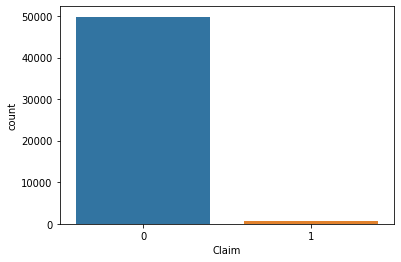

In [13]:
#Count of target
sns.countplot(y)

In [14]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns


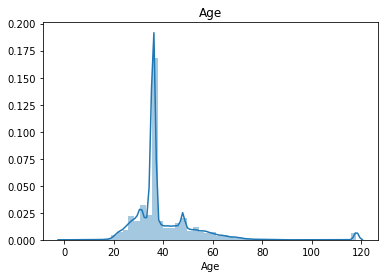

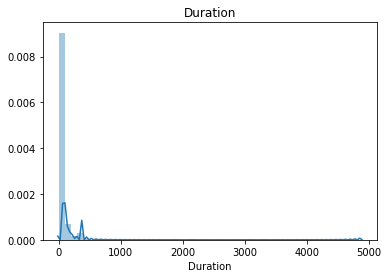

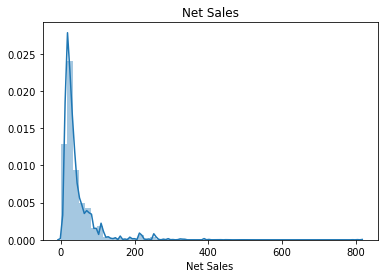

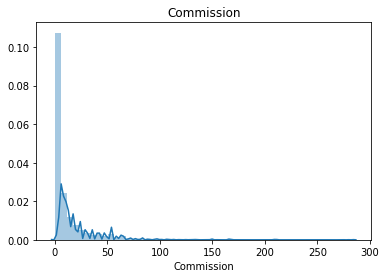

In [15]:
for col in num_cols:
    sns.distplot(X[col])
    plt.xlabel(col)
    plt.title(col)
    plt.show()

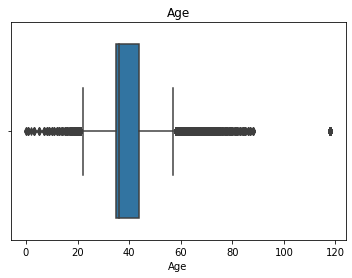

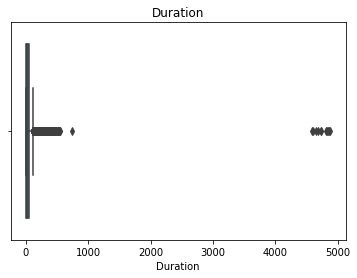

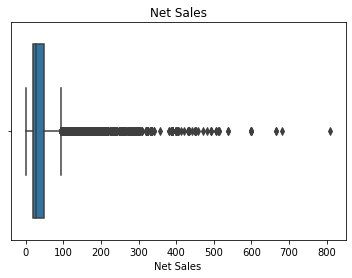

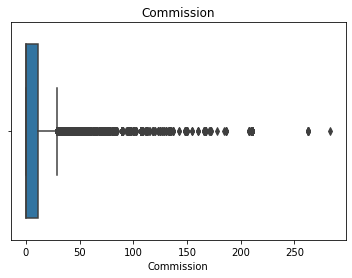

In [18]:
#Numerical feature distribution
for col in X.select_dtypes(exclude=['object']):
    sns.boxplot(X[col])
    plt.xlabel(col)
    plt.title(col)
    plt.show()

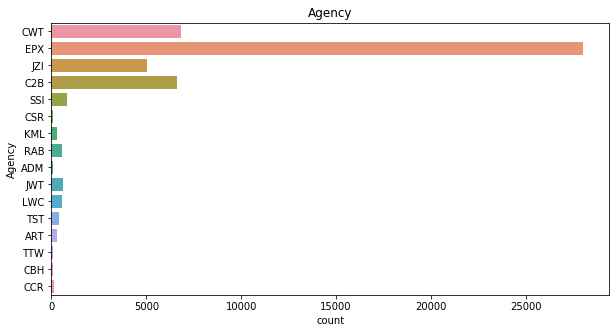

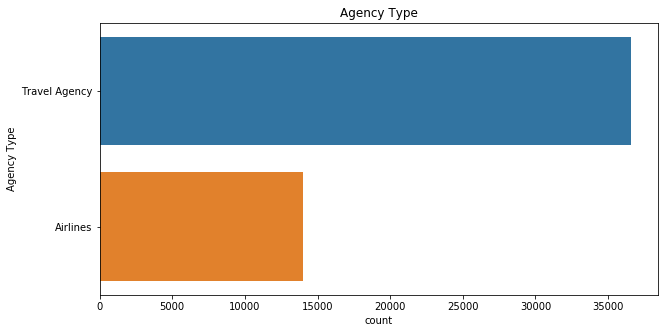

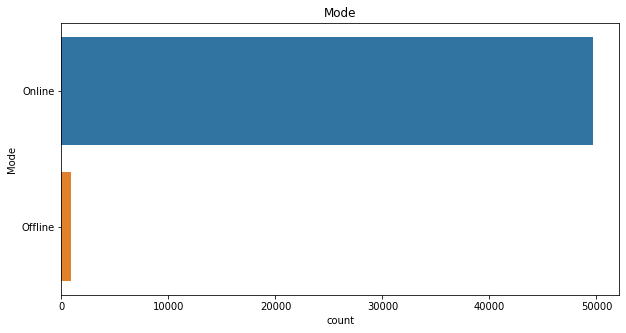

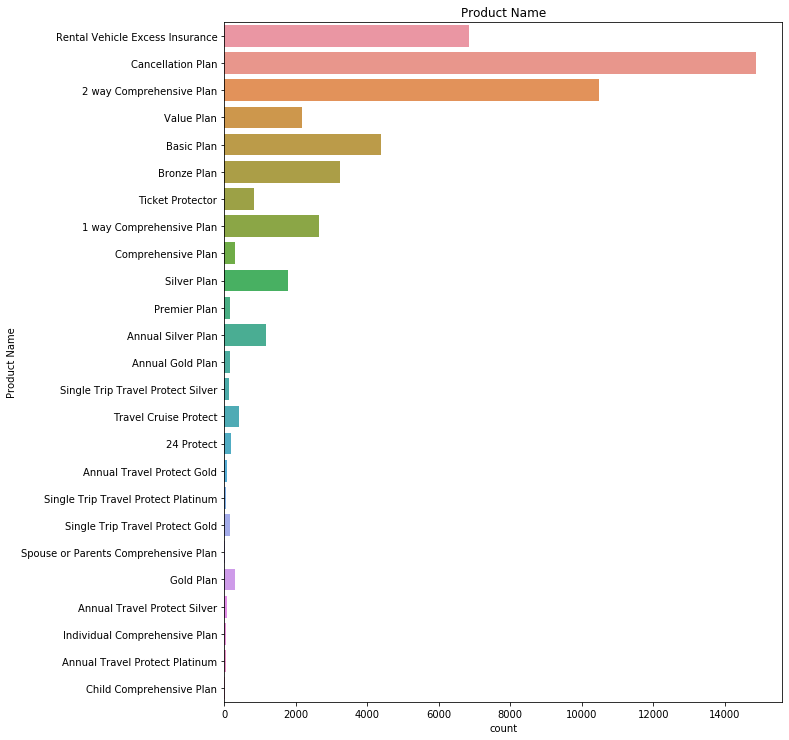

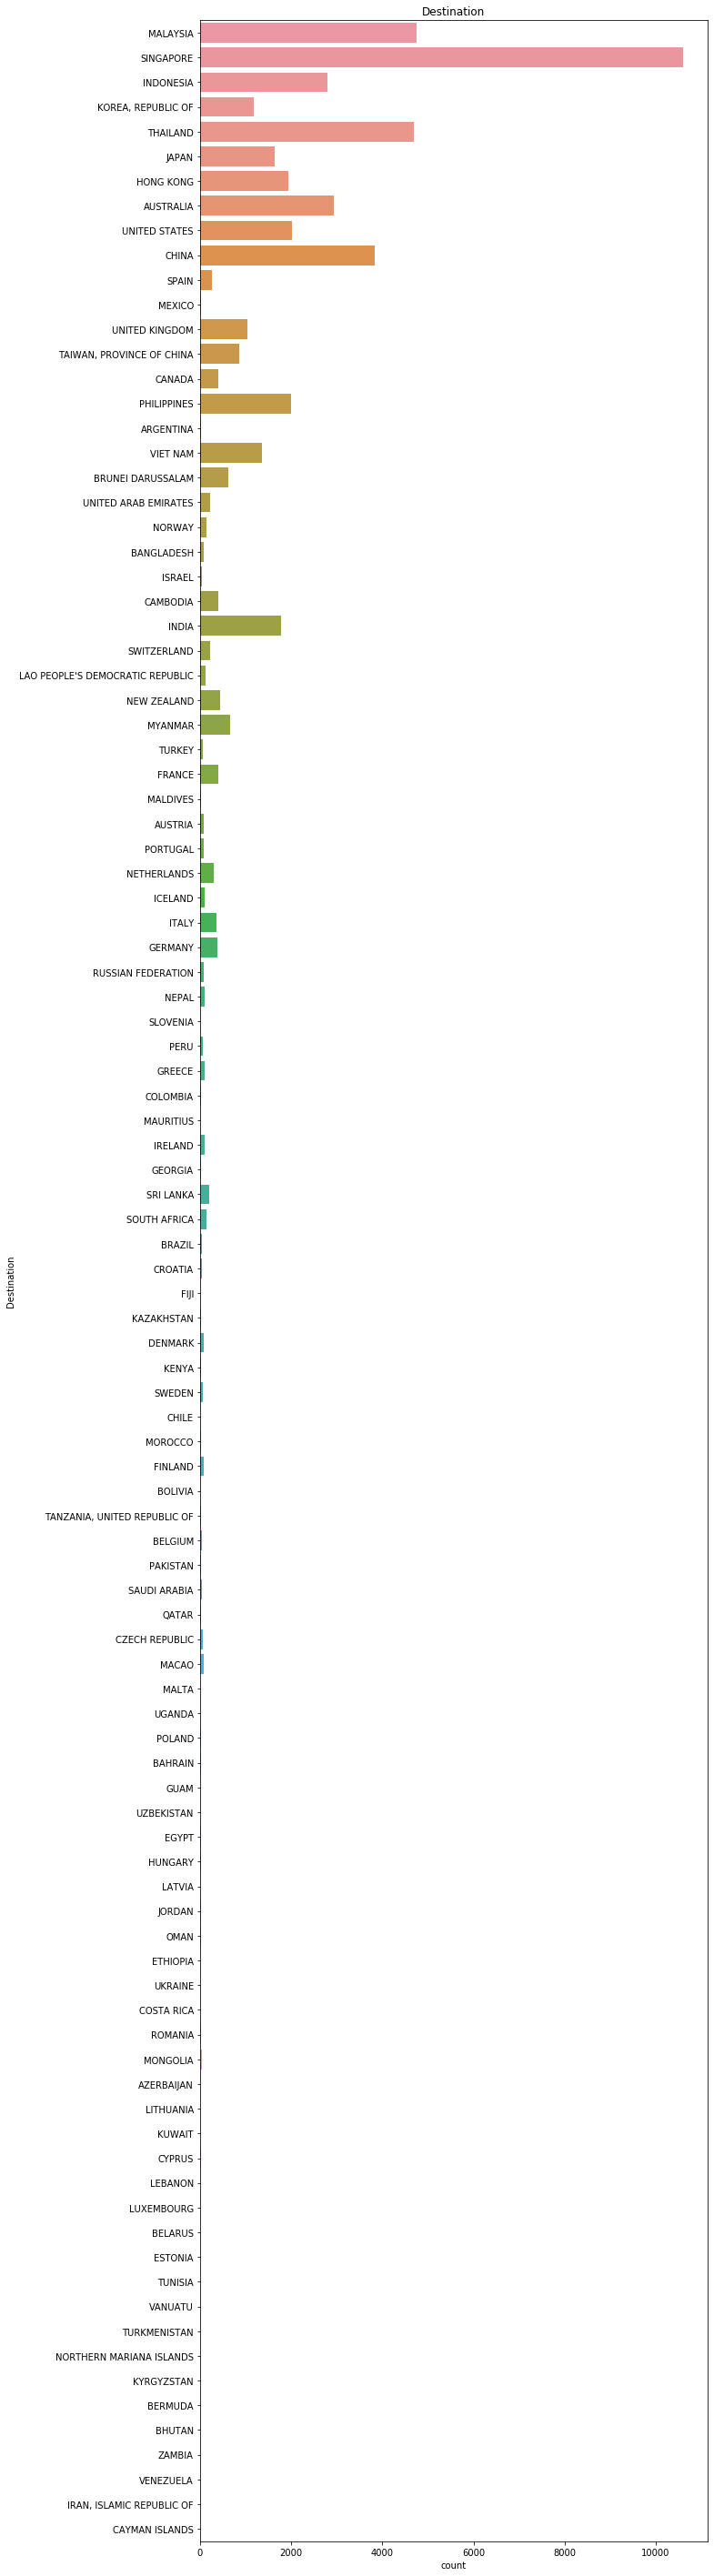

In [17]:
#Categorical feature distribution
for col in X.select_dtypes(include=['object']):
    y_size=5
    if X[col].nunique()/2 > 10:
        y_size=X[col].nunique()/2
    #print(round(y_size))
    plt.figure(figsize=(10,y_size))
    sns.countplot(y=X[col])
    plt.title(col)
    plt.show()

In [19]:
#Remove skewness
#+ve/right skewed - apply log transformation
skew_feat=['Duration','Net Sales', 'Commission']
print('Before normalization')
print(X[skew_feat].skew())
for col in skew_feat:
    X[col]=np.sqrt(X[col])
print('After sqrt transformation')
print(X[skew_feat].skew())

Before normalization
Duration      22.873171
Net Sales      3.751304
Commission     4.078189
dtype: float64
After sqrt transformation
Duration      2.409497
Net Sales     1.444042
Commission    1.351360
dtype: float64


(4.0, 0.0)

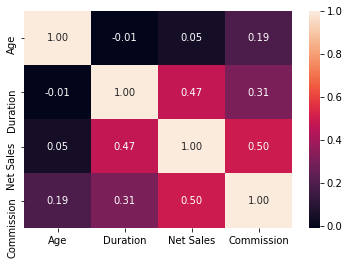

In [20]:
df_corr = X.corr()
ax = sns.heatmap(df_corr, annot=True, fmt='.2f') #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
#not much correlation

In [21]:
#label encoding
encoder = LabelEncoder()
for col in cat_cols:
    X[col] = encoder.fit_transform(X[col])

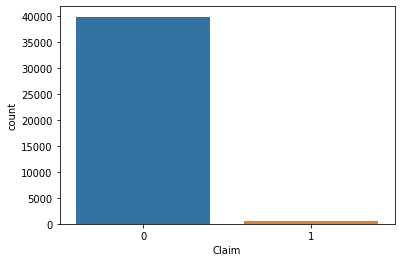

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size =0.2)
sns.countplot(y_train)

### Logistic Regression

In [23]:
#Basic logreg model
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(precision_score(y_test,y_pred))
print("Classification matrix")
pd.crosstab(y_pred, y_test, rownames=['Predicted'], colnames=['Actual'])

0.0
Classification matrix


C:\Users\vth006\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Actual,0,1
Predicted,,
0,9961,149
1,1,0


### Decision tree

In [24]:
#Basic decision tree model
model_dt=DecisionTreeClassifier(random_state=0)
model_dt.fit(X_train,y_train)
y_pred1=model_dt.predict(X_test)
print("Accuracy = " , accuracy_score(y_test, y_pred1))
print("Precision = " ,precision_score(y_test, y_pred1))
print("Recall = " ,recall_score(y_test, y_pred1))
print("F1 Score = " ,f1_score(y_test, y_pred1))
print("Classification matrix")
pd.crosstab(y_pred1, y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.9696370289783405
Precision =  0.06111111111111111
Recall =  0.0738255033557047
F1 Score =  0.0668693009118541
Classification matrix


Actual,0,1
Predicted,,
0,9793,138
1,169,11


### Hyperparameter tuning

In [25]:
#Importing header files
from sklearn.model_selection import GridSearchCV

#Parameter grid
parameter_grid = {'max_depth': np.arange(3,10), 'min_samples_leaf': range(10,50,10)}

# Code starts here
dt=DecisionTreeClassifier(random_state=0)
p_tree=GridSearchCV(estimator=dt, param_grid=parameter_grid,cv=5)
p_tree.fit(X_train,y_train)
y_pred2=p_tree.predict(X_test)
# Code ends here

In [26]:
print("Accuracy = " , accuracy_score(y_test, y_pred2))
print("Precision = " ,precision_score(y_test, y_pred2))
print("Recall = " ,recall_score(y_test, y_pred2))
print("F1 Score = " ,f1_score(y_test, y_pred2))
print("Classification matrix")
pd.crosstab(y_pred2, y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.9852635743249926
Precision =  0.0
Recall =  0.0
F1 Score =  0.0
Classification matrix


C:\Users\vth006\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Actual,0,1
Predicted,,
0,9962,149


### Smote

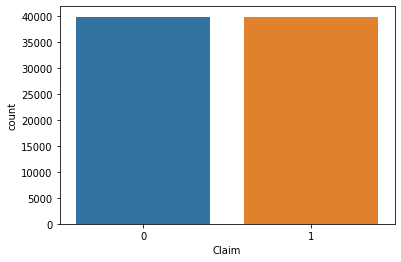

In [27]:
# Import package
from imblearn.over_sampling import SMOTE


#Code starts here

#Initialising a SMOTE object
smote = SMOTE(random_state=12,sampling_strategy=1.0)

#Sampling the data using SMOTE
X_sample_3, y_sample_3 = smote.fit_sample(X_train, y_train)

# Using a countplot plot the distribution of y_sample_3
sns.countplot(y_sample_3)



In [28]:
#SMote decision tree model
dt_smote=DecisionTreeClassifier(random_state=0)
dt_smote.fit(X_sample_3, y_sample_3)
y_pred_smote=dt_smote.predict(X_test)
print("Accuracy = " , accuracy_score(y_test, y_pred_smote))
print("Precision = " ,precision_score(y_test, y_pred_smote))
print("Recall = " ,recall_score(y_test, y_pred_smote))
print("F1 Score = " ,f1_score(y_test, y_pred_smote))
print("Classification matrix")
pd.crosstab(y_pred_smote, y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.9463950153298388
Precision =  0.04408352668213457
Recall =  0.12751677852348994
F1 Score =  0.06551724137931034
Classification matrix


Actual,0,1
Predicted,,
0,9550,130
1,412,19


### Random over sampling

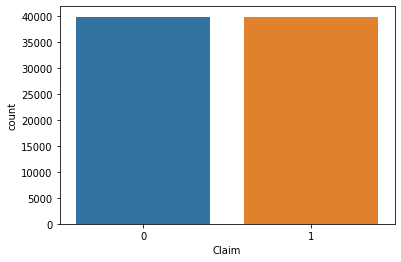

In [29]:
from imblearn.over_sampling  import RandomOverSampler
#Code starts here

# Create random under sampler object
rus = RandomOverSampler(random_state=0)

#Undersampling the train data
X_sample_1, y_sample_1 =  rus.fit_sample(X_train, y_train)
sns.countplot(y_sample_1)

In [30]:
#decision tree model after random oversampling
dt_ros=DecisionTreeClassifier(random_state=0)
dt_ros.fit(X_sample_1, y_sample_1)
y_pred_ros=dt_ros.predict(X_test)
print("Accuracy = " , accuracy_score(y_test, y_pred_ros))
print("Precision = " ,precision_score(y_test, y_pred_ros))
print("Recall = " ,recall_score(y_test, y_pred_ros))
print("F1 Score = " ,f1_score(y_test, y_pred_ros))
print("Classification matrix")
pd.crosstab(y_pred_ros, y_test, rownames=['Predicted'], colnames=['Actual'])

Accuracy =  0.9717139748788448
Precision =  0.034013605442176874
Recall =  0.03355704697986577
F1 Score =  0.033783783783783786
Classification matrix


Actual,0,1
Predicted,,
0,9820,144
1,142,5


In [31]:
#Ensemble
decision_clf1 = DecisionTreeClassifier(criterion = 'gini',random_state=0)
decision_clf2 = DecisionTreeClassifier(criterion = 'gini', random_state=42)

#Creation of list of models
Model_List=[('Decision Tree 1', decision_clf1),
('Decision Tree 2', decision_clf2)]

#Hard voting taking mode
voting_clf_hard=VotingClassifier(estimators=Model_List,voting='hard')
voting_clf_hard.fit(X_train,y_train)
y_pred_hard=voting_clf_hard.predict(X_test)
print("Precision = " ,precision_score(y_test, y_pred_hard))

#Soft voting taking mean
voting_clf_soft=VotingClassifier(estimators=Model_List,voting='soft')
voting_clf_soft.fit(X_train,y_train)
y_pred_soft=voting_clf_hard.predict(X_test)
print("Precision = " ,precision_score(y_test, y_pred_soft))

Precision =  0.059880239520958084
Precision =  0.059880239520958084


### Bagging

In [32]:
bagging_clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100 , max_samples=100, random_state=0)
bagging_clf.fit(X_train,y_train)
y_pred_bag=bagging_clf.predict(X_test)
print("Precision = " ,precision_score(y_test, y_pred_bag))

Precision =  0.0


C:\Users\vth006\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Pasting

In [33]:
pasting_clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100 , max_samples=100,bootstrap = False, random_state=0)
pasting_clf.fit(X_train,y_train)
y_pred_paste=pasting_clf.predict(X_test)
print("Precision = " ,precision_score(y_test, y_pred_paste))

Precision =  0.0


C:\Users\vth006\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random forest

In [34]:
rf_clf=RandomForestClassifier(n_estimators=100,n_jobs=100, min_samples_leaf=100, random_state=0)
rf_clf.fit(X_train,y_train)
y_pred_random=rf_clf.predict(X_test)
print("Precision = " ,precision_score(y_test, y_pred_random))


Precision =  0.0


C:\Users\vth006\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Stacking

In [35]:
from mlxtend.classifier import StackingClassifier
classifier1 = DecisionTreeClassifier(random_state=0)
classifier2= DecisionTreeClassifier(random_state=1)
classifier3 = DecisionTreeClassifier(random_state=2)
classifier4= DecisionTreeClassifier(random_state=3)
classifier_list=[classifier1,classifier2,classifier3,classifier4]
m_classifier=LogisticRegression(random_state=0)
# Code starts here
sclf=StackingClassifier(classifiers=classifier_list,meta_classifier=m_classifier)
sclf.fit(X_train,y_train)
y_pred_stack=sclf.predict(X_test)
print("Precision = " ,precision_score(y_test, y_pred_stack))

Precision =  0.057803468208092484


### Adaboosting

In [38]:

#Fitting of Weak Classifier
dt_clf=DecisionTreeClassifier(max_depth=1,random_state=0)
dt_clf.fit(X_train,y_train)
dt_score=dt_clf.score(X_test,y_test)

# Fitting of weak classifier with Adaboost
ada_clf=AdaBoostClassifier(base_estimator=dt_clf, random_state=0)
ada_clf.fit(X_train,y_train)
y_pred_ada = ada_clf.predict(X_test)
print("Precision = " ,precision_score(y_test, y_pred_ada))

Precision =  0.0


C:\Users\vth006\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Gradient boosting

In [41]:
gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train,y_train)
y_pred_grad=gb_clf.predict(X_test)
print("Precision = " ,precision_score(y_test, y_pred_grad))

Precision =  0.14285714285714285


### XGboost

<function matplotlib.pyplot.show(*args, **kw)>

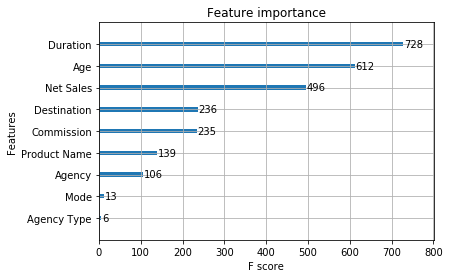

In [49]:
from xgboost import plot_importance
from xgboost import XGBClassifier

xgb_clf=XGBClassifier(random_state=0)
xgb_clf.fit(X_train,y_train)
#y_pred_xg=xgb_clf.predict(X_test,y_test)
#print("Precision = " ,precision_score(y_test, y_pred_xg))

plot_importance(xgb_clf)
plt.show

### ROC curve

In [50]:
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [rf_clf,model_dt,voting_clf_soft,sclf, gb_clf,xgb_clf]

for cls in classifiers:
    model = cls.fit(X_train, y_train)
    #predicted probabilities for each class for each sample. Output is an array of [n_samples, n_classes]
    yproba = model.predict_proba(X_test)[::,1] # to select probability estimates of the positive class
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

In [51]:
# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,fpr,tpr,auc
classifiers,,,
RandomForestClassifier,"[0.0, 0.0001003814495081309, 0.000200762899016...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00671140...",0.802263
DecisionTreeClassifier,"[0.0, 0.01696446496687412, 0.01887171250752860...","[0.0, 0.0738255033557047, 0.0738255033557047, ...",0.527036
VotingClassifier,"[0.0, 0.015759887572776552, 0.0159606504717928...","[0.0, 0.06711409395973154, 0.06711409395973154...",0.525941
StackingClassifier,"[0.0, 0.014254165830154587, 0.0163621762698253...","[0.0, 0.053691275167785234, 0.0671140939597315...",0.526288
GradientBoostingClassifier,"[0.0, 0.0001003814495081309, 0.000501907247540...","[0.0, 0.0, 0.0, 0.006711409395973154, 0.006711...",0.803450
XGBClassifier,"[0.0, 0.0001003814495081309, 0.000301144348524...","[0.0, 0.0, 0.0, 0.006711409395973154, 0.006711...",0.750979


In [ ]:
result_table

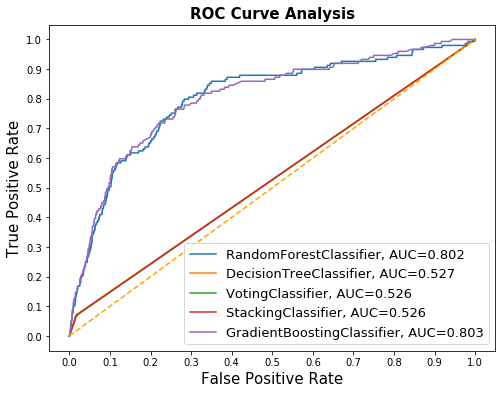

In [44]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()